In [46]:
import zipfile, os
local_zip = '/content/data-cabe.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

base_dir = '/content/Data-cabe'
os.listdir(base_dir)


['Rusak', 'Matang', 'Belum Matang', 'Kering', 'Tua']

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


train_data = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)


validation_data = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1031 images belonging to 5 classes.
Found 255 images belonging to 5 classes.


In [48]:
batch_images, batch_labels = next(train_data)
print(f"Images batch shape: {batch_images.shape}")
print(f"Labels batch shape: {batch_labels.shape}")


Images batch shape: (32, 150, 150, 3)
Labels batch shape: (32, 5)


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)


history = model.fit(
    train_data,
    steps_per_epoch=32 ,
    validation_data=validation_data,
    validation_steps=7,
    epochs=30,
    callbacks=[early_stopping]
)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.3748 - loss: 1.9942 - val_accuracy: 0.7545 - val_loss: 1.1728
Epoch 2/30
 1/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6250 - loss: 1.1313

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6250 - loss: 1.1313 - val_accuracy: 0.5484 - val_loss: 1.2813
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.6086 - loss: 0.9220 - val_accuracy: 0.6473 - val_loss: 1.1339
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5312 - loss: 1.0139 - val_accuracy: 0.7097 - val_loss: 0.9246
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.6443 - loss: 0.8202 - val_accuracy: 0.8705 - val_loss: 0.5653
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6250 - loss: 0.7905 - val_accuracy: 0.9032 - val_loss: 0.5476
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.8217 - loss: 0.4609 - val_accuracy: 0.8393 - val_loss: 0.4863
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.6562 - loss: 0.5987 - val_accuracy: 0.8065 - val_loss: 0.6279
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.8187 - loss: 0.4582 - val_accuracy: 0.8438 - val_loss: 0.484

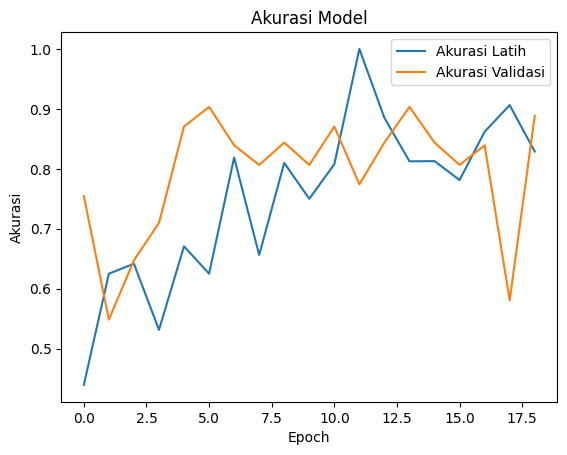

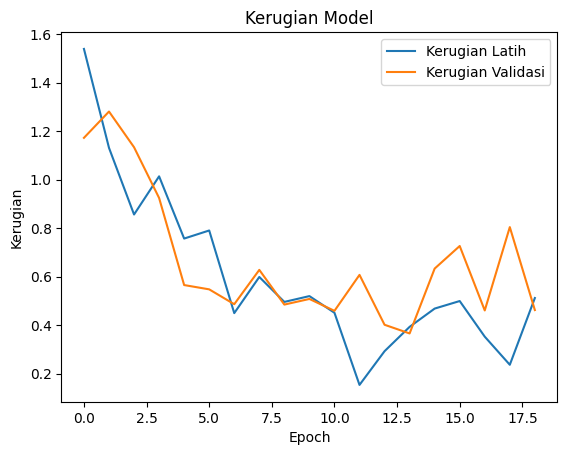

In [51]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Akurasi Latih')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Kerugian Latih')
plt.plot(history.history['val_loss'], label='Kerugian Validasi')
plt.title('Kerugian Model')
plt.ylabel('Kerugian')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Saving IMG_20220601_094321.jpg to IMG_20220601_094321 (1).jpg


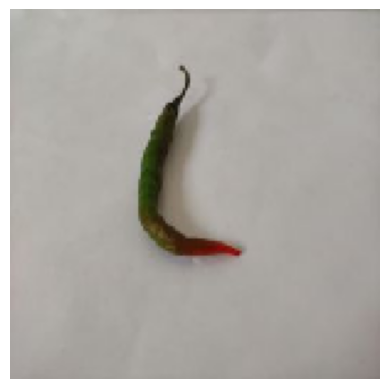

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Prediksi: Matang dengan probabilitas: 1.00
Gambar: IMG_20220601_094321 (1).jpg


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image

# Upload gambar cabai
uploaded = files.upload()

# Nama kelas sesuai dengan folder dataset kamu
class_names = [ 'Belum Matang', 'Kering','Matang','Rusak',  'Tua']

# Proses setiap gambar yang di-upload
for fn in uploaded.keys():

    # Load gambar dan ubah ukurannya sesuai dengan input model (150x150)
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    # Tampilkan gambar
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Konversi gambar ke array dan perluas dimensinya agar sesuai dengan batch (batch_size, height, width, channels)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Prediksi kelas gambar menggunakan model
    classes = model.predict(x)

    # Dapatkan kelas yang diprediksi
    predicted_class = np.argmax(classes[0])

    # Tampilkan prediksi dan probabilitasnya
    print(f'Prediksi: {class_names[predicted_class]} dengan probabilitas: {classes[0][predicted_class]:.2f}')
    print(f'Gambar: {fn}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


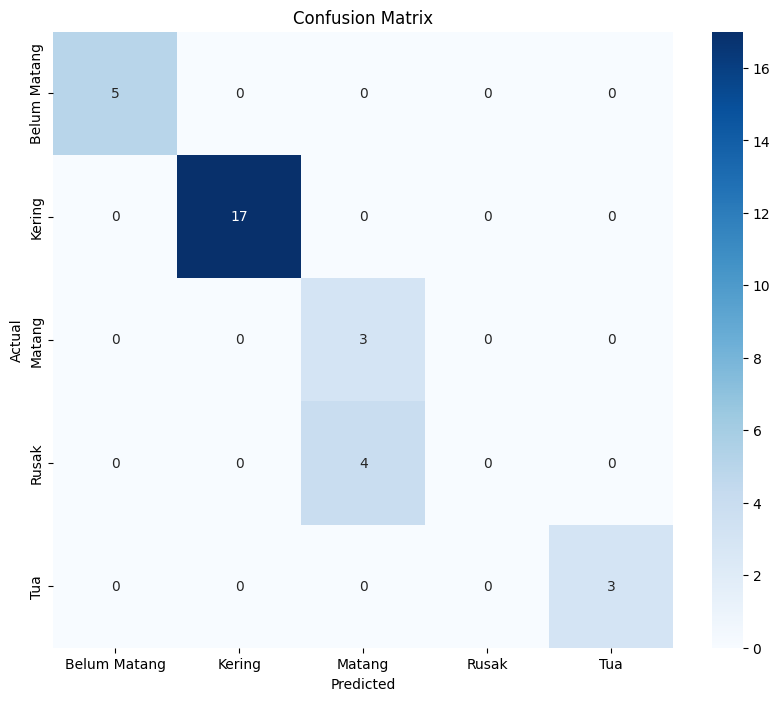

              precision    recall  f1-score   support

Belum Matang       1.00      1.00      1.00         5
      Kering       1.00      1.00      1.00        17
      Matang       0.43      1.00      0.60         3
       Rusak       0.00      0.00      0.00         4
         Tua       1.00      1.00      1.00         3

    accuracy                           0.88        32
   macro avg       0.69      0.80      0.72        32
weighted avg       0.82      0.88      0.84        32



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [53]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

val_images, val_labels = next(validation_data)
predictions = model.predict(val_images)
predicted_classes = np.argmax(predictions, axis=1)

cm = confusion_matrix(np.argmax(val_labels, axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(np.argmax(val_labels, axis=1), predicted_classes, target_names=class_names))
